<a href="https://colab.research.google.com/github/FarhanFansuri/Anjing-vs-Kucing-Image-Augmentation/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset, info = tfds.load('cats_vs_dogs', with_info = True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteNRO4MS/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
label_names = info.features['label'].names

In [4]:
for i, data in enumerate(dataset['train']):
  image, label = data
  foldername = './cats_vs_dogs/train/{}'.format(label_names[label])
  os.makedirs(foldername,exist_ok = True)
  filename = foldername + '/{}_{}.jpg'.format(label_names[label],i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())


In [27]:
data_generator = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range =0.1,
    zoom_range=0.10,
    horizontal_flip=True
    )

train_data_generator = data_generator.flow_from_directory(
    '/content/cats_vs_dogs/train',
    target_size=(150,150),
    batch_size=216,
    class_mode='binary',
    subset='training'
)

validation_data_generator = data_generator.flow_from_directory(
    '/content/cats_vs_dogs/train',
    target_size=(150,150),
    batch_size=216,
    class_mode='binary',
    subset='validation'
)

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [28]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 74, 74, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)       

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_data_generator,
    epochs=10,
    validation_data=validation_data_generator
)

Epoch 1/10
87/87 [==============================] - 169s 2s/step - loss: 2.2635 - accuracy: 0.6225 - val_loss: 0.9968 - val_accuracy: 0.5042
Epoch 2/10
87/87 [==============================] - 162s 2s/step - loss: 0.6685 - accuracy: 0.6943 - val_loss: 1.4257 - val_accuracy: 0.5020
Epoch 3/10
87/87 [==============================] - 165s 2s/step - loss: 0.5196 - accuracy: 0.7486 - val_loss: 1.7017 - val_accuracy: 0.5033
Epoch 4/10
87/87 [==============================] - 165s 2s/step - loss: 0.4740 - accuracy: 0.7733 - val_loss: 3.3408 - val_accuracy: 0.5020
Epoch 5/10
87/87 [==============================] - 164s 2s/step - loss: 0.4502 - accuracy: 0.7875 - val_loss: 2.2926 - val_accuracy: 0.5229
Epoch 6/10
87/87 [==============================] - 163s 2s/step - loss: 0.4250 - accuracy: 0.8024 - val_loss: 1.5209 - val_accuracy: 0.5769
Epoch 7/10
87/87 [==============================] - 157s 2s/step - loss: 0.4046 - accuracy: 0.8144 - val_loss: 1.1425 - val_accuracy: 0.6214
Epoch 8/10
87

In [31]:
history.history

{'loss': [2.263458728790283,
  0.6684941053390503,
  0.5195536017417908,
  0.47395315766334534,
  0.4501704275608063,
  0.4250193238258362,
  0.4045720398426056,
  0.39139023423194885,
  0.3846038281917572,
  0.3699076473712921],
 'accuracy': [0.6225350499153137,
  0.694320559501648,
  0.7486432790756226,
  0.7732523679733276,
  0.7875450253486633,
  0.802428662776947,
  0.8144108057022095,
  0.8229541778564453,
  0.8223631381988525,
  0.8355273604393005],
 'val_loss': [0.9967871904373169,
  1.4256775379180908,
  1.701689600944519,
  3.3407883644104004,
  2.292556047439575,
  1.5208640098571777,
  1.142493724822998,
  0.847464382648468,
  0.9208499193191528,
  0.5714807510375977],
 'val_accuracy': [0.5041926503181458,
  0.5020425915718079,
  0.5033326148986816,
  0.5020425915718079,
  0.5228983163833618,
  0.5768651962280273,
  0.6213717460632324,
  0.6774886846542358,
  0.6955493688583374,
  0.7796173095703125]}

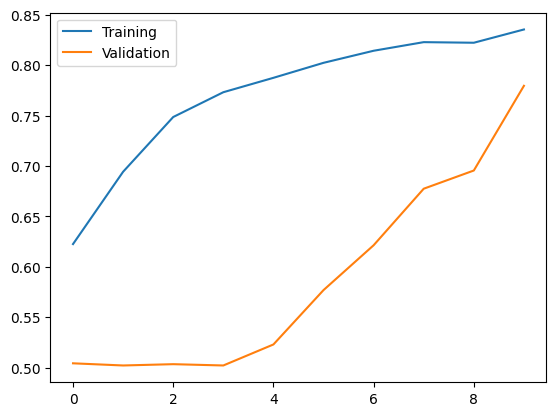

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training',"Validation"])